In [109]:
#import needed libraries

import librosa as lb #used for feature extracion and resampling
import numpy as np 
import matplotlib.pyplot as plt
import librosa.display #builds on matplotlib to draw nice spectrograms.
import IPython.display as ipd #used to play .wav files from notebook
import pandas as pd 
# from scipy.io import wavfile #can be used to import .wav files but does not work on 24 bit depth audio files


import soundfile as sf #soundfile enables loading 24 bit depth audio files.
import time #used to measure code runtime. 
import glob
from collections import defaultdict
import pickle
import seaborn as sns
from collections import defaultdict
import scipy

In [2]:
#defining a function that reads an audio file as a numpy array
def ReadAudio(filename):
    x,sr=sf.read(filename)
    x=np.array(x)
    x=x.T
    #x=x.T #transpose to match format of librosa array representation
    #set sample rate at 22050 to reduce memory usage. 
    x=lb.resample(x,sr,22050)
        
    #change any stereo audio to mono.
    if x.shape[0] ==2:
        x=lb.to_mono(x)
     
    #change to a list.
    return x,22050

In [3]:
#get presaved dataframe of the properties of each sound:
with open('DataSummary/SummaryDFWithLabels.pickle', 'rb') as handle:
    PropsDF=pickle.load(handle)

In [4]:
PropsDF.head()

,ID_x,SR,length,Max,Min,Average,Duration,RealID,ID_y,Class
0,train\0.wav,44100,176400,0.477905,-0.522919,-0.000102,4.0,0,0.0,siren
1,train\1.wav,48000,192000,0.391418,-0.390747,-0.000525,4.0,1,1.0,street_music
2,train\10.wav,44100,176400,0.537064,-0.554016,-0.001036,4.0,10,10.0,street_music
3,train\100.wav,44100,176400,0.246109,-0.303329,0.000141,4.0,100,100.0,air_conditioner
4,train\1000.wav,44100,176400,0.210068,-0.241394,0.000050,4.0,1000,1000.0,street_music


## Feature Extraction


In [5]:
#Get all unique sounds:
TrainDF=PropsDF[pd.isnull(PropsDF['Class'])!=True]


classes=TrainDF['Class'].unique()

TrainingSoundsIDs=defaultdict(list)
#TestingSoundsIDs=defaultdict(list)


for sound in classes:
    TrainingSoundsIDs[sound].extend(TrainDF[TrainDF['Class']==sound]['RealID'].values)
    #TestingSoundsIDs[sound].extend(TestDF[TestDF['Class']==sound]['RealID'].values)
    


## What a drilling noise looks like
Note duration of sound < 4 s

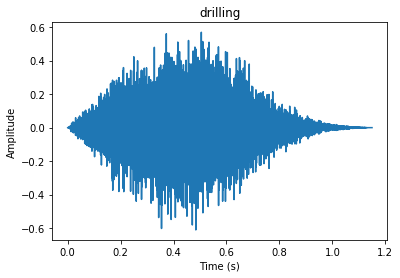

In [191]:
for counter,label in enumerate([classes[6]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        plt.plot(np.arange(1,len(x)+1)/sr,x)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(label)
        

## What a siren noise looks like
Note duration of sound = 4 s

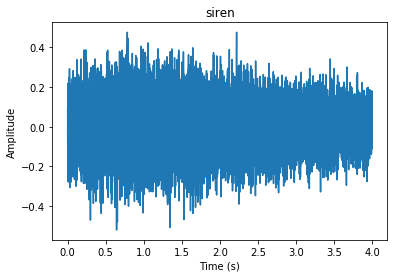

In [192]:
for counter,label in enumerate([classes[0]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        plt.plot(np.arange(1,len(x)+1)/sr,x)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(label)

## Feature 1: Mel-frequency cepstral coefficients:


For Drilling:

the size of the coefficients matrix is: (40,)


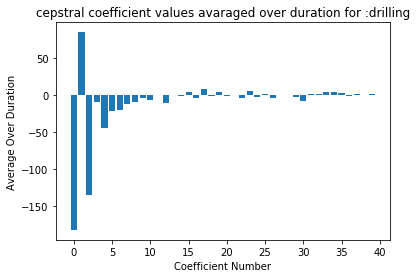

In [199]:
for counter,label in enumerate([classes[6]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T,axis=0)
        plt.xlabel('Coefficient Number')
        plt.ylabel('Average Over Duration')
        plt.bar(np.arange(0,len(mfccs)),mfccs)
        print('the size of the coefficients matrix is: '+str(mfccs.shape))
        plt.title('cepstral coefficient values avaraged over duration for :'+label)
        

We note that the x axis here is not time, but the coefficient and the y-axis is its average over time.

for siren

the size of the coefficients matrix is: (40,)


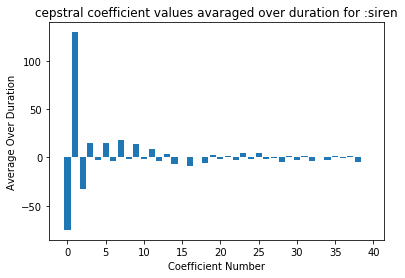

In [200]:
for counter,label in enumerate([classes[0]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T,axis=0)
        plt.xlabel('Coefficient Number')
        plt.ylabel('Average Over Duration')
        plt.bar(np.arange(0,len(mfccs)),mfccs)
        print('the size of the coefficients matrix is: '+str(mfccs.shape))
        plt.title('cepstral coefficient values avaraged over duration for :'+label)
        

## Feature 2: Mel-scaled power spectrogram

For Drilling

the size of the mel matrix is: (128,)


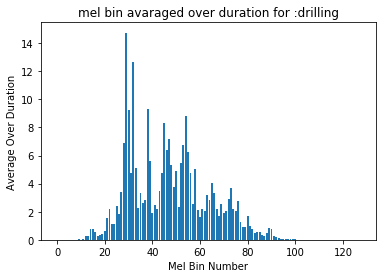

In [201]:
for counter,label in enumerate([classes[6]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        mel = np.mean(librosa.feature.melspectrogram(x, sr=sr).T,axis=0)
        plt.xlabel('Mel Bin Number')
        plt.ylabel('Average Over Duration')
        plt.bar(np.arange(0,len(mel)),mel)

        plt.title('mel bin avaraged over duration for :'+label)
        print('the size of the mel matrix is: '+str(mel.shape))
        

For Siren:

the size of the mel matrix is: (128,)


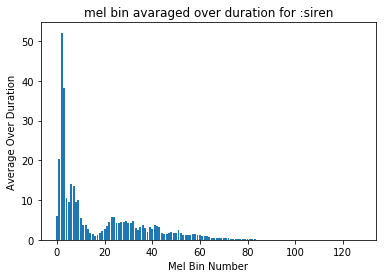

In [202]:
for counter,label in enumerate([classes[0]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        mel = np.mean(librosa.feature.melspectrogram(x, sr=sr).T,axis=0)
        plt.xlabel('Mel Bin Number')
        plt.ylabel('Average Over Duration')
        plt.bar(np.arange(0,len(mel)),mel)

        plt.title('mel bin avaraged over duration for :'+label)
        print('the size of the mel matrix is: '+str(mel.shape))
        
        

## Feature 3: Chormagram of a short-time Fourier transform

For Drilling:

the size of the mel matrix is: (12,)


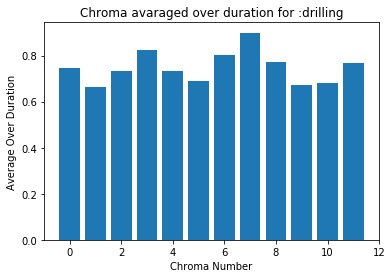

In [203]:
for counter,label in enumerate([classes[6]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        stft = np.abs(librosa.stft(x))
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
        plt.xlabel('Chroma Number')
        plt.ylabel('Average Over Duration')
        plt.bar(np.arange(0,len(chroma)),chroma)

        plt.title('Chroma avaraged over duration for :'+label)
        print('the size of the mel matrix is: '+str(chroma.shape))

For Siren:

the size of the mel matrix is: (12,)


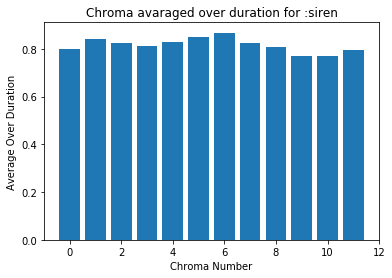

In [206]:
for counter,label in enumerate([classes[0]]):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        stft = np.abs(librosa.stft(x))
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
        plt.xlabel('Chroma Number')
        plt.ylabel('Average Over Duration')
        plt.bar(np.arange(0,len(chroma)),chroma)

        plt.title('Chroma avaraged over duration for :'+label)
        print('the size of the mel matrix is: '+str(chroma.shape))

## Feature 4: Octave-based spectral constrast


For Drilling:

the size of the mel matrix is: (7,)


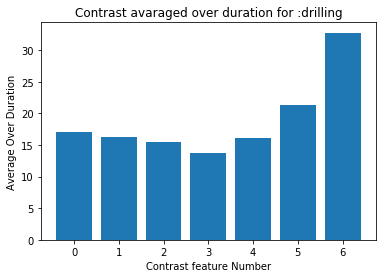

In [207]:
for counter,label in enumerate([classes[6]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        stft = np.abs(librosa.stft(x))
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T,axis=0)
        plt.xlabel('Contrast feature Number')
        plt.ylabel('Average Over Duration')
        plt.bar(np.arange(0,len(contrast)),contrast)

        plt.title('Contrast avaraged over duration for :'+label)
        print('the size of the mel matrix is: '+str(contrast.shape))

For Siren:

the size of the mel matrix is: (7,)


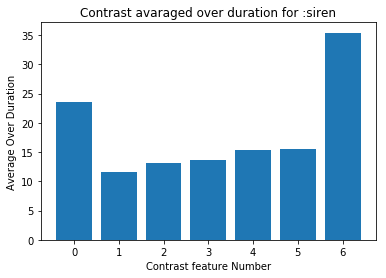

In [208]:
for counter,label in enumerate([classes[0]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        stft = np.abs(librosa.stft(x))
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T,axis=0)
        plt.xlabel('Contrast feature Number')
        plt.ylabel('Average Over Duration')
        plt.bar(np.arange(0,len(contrast)),contrast)

        plt.title('Contrast avaraged over duration for :'+label)
        print('the size of the mel matrix is: '+str(contrast.shape))

## Feature 5: Tonnetz

For Drilling:

the size of the mel matrix is: (6,)


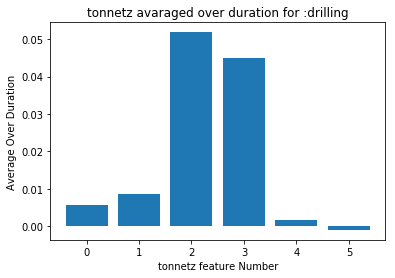

In [209]:
for counter,label in enumerate([classes[6]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(x),sr=sr).T,axis=0)
        plt.xlabel('tonnetz feature Number')
        plt.ylabel('Average Over Duration')
        plt.bar(np.arange(0,len(tonnetz)),tonnetz)

        plt.title('tonnetz avaraged over duration for :'+label)
        print('the size of the mel matrix is: '+str(tonnetz.shape))

for Siren:

the size of the mel matrix is: (6,)


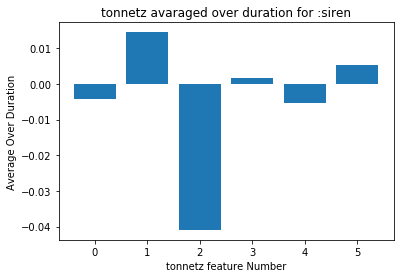

In [210]:
for counter,label in enumerate([classes[0]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(x),sr=sr).T,axis=0)
        plt.xlabel('tonnetz feature Number')
        plt.ylabel('Average Over Duration')
        plt.bar(np.arange(0,len(tonnetz)),tonnetz)

        plt.title('tonnetz avaraged over duration for :'+label)
        print('the size of the mel matrix is: '+str(tonnetz.shape))

We now get all these features for all our training Data. Before we do that we create a function that takes in each file and reads it then extracts all the needed features. We also concatenate all these features to get a feature of 193 dimensions for each sound

    

In [18]:
def extractFeatures(x,sr):
    """x is numpy array"""
    stft = np.abs(librosa.stft(x))
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(x, sr=sr).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(x),sr=sr).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz


In [19]:
Data=defaultdict(list)
for counter,label in enumerate(classes):
    for sample in range(len(TrainingSoundsIDs[label])):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        mfccs,chroma,mel,contrast,tonnetz=extractFeatures(x,sr)
        Data['label'].append(label)
        Data['ID'].append(localfile)
        Data['mfccs'].append(mfccs)
        Data['chroma'].append(chroma)
        Data['mel'].append(mel)
        Data['contrast'].append(contrast)
        Data['tonnetz'].append(tonnetz)
        

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-package

In [20]:
DF=pd.DataFrame.from_dict(Data)

In [21]:
DF.set_index('ID')

,label,mfccs,chroma,mel,contrast,tonnetz
ID,,,,,,
0,siren,"[-75.09571792626822, 129.61184458091378, -32.6...","[0.7980707816739436, 0.8427070825044805, 0.823...","[5.877085445007955, 20.33889982137498, 52.0855...","[23.510048216944433, 11.643499808547158, 13.09...","[-0.0042554803037486745, 0.01448110411155963, ..."
1017,siren,"[-529.8225494418793, 3.2076505339364685, -39.3...","[0.08090471232353598, 0.08035193556053438, 0.0...","[9.34236179025065e-05, 9.948022874526434e-05, ...","[14.064938851300749, 14.978454796246718, 19.68...","[0.0002255418432944371, -0.0030609019752762634..."
1068,siren,"[-321.6916830761862, 142.7038945186553, -29.06...","[0.1902738716518209, 0.28698146608139546, 0.62...","[0.40485056831127697, 0.19118292147128665, 0.1...","[16.32455248030355, 11.677134733302422, 21.571...","[0.02528116450492904, 0.02472165911676403, -0...."
1069,siren,"[-251.96383863061635, 114.6776430250902, -70.2...","[0.3409404818757896, 0.30787157794978254, 0.34...","[0.13748312859519332, 0.18488512055652828, 0.1...","[17.49563358023726, 11.984385762877812, 23.411...","[-0.009540088965422818, 0.018023271817841257, ..."
1116,siren,"[-341.2867620636534, 148.38603712522664, -19.5...","[0.7123752698618745, 0.7746882758732201, 0.801...","[0.033555781614938975, 0.2545905225829939, 1.1...","[17.758983501752894, 11.679243525120805, 12.92...","[0.0018518256420877674, 0.002387007442717239, ..."
1119,siren,"[-260.286934842184, 127.99113056140794, -52.65...","[0.4406202068792027, 0.3893876228192956, 0.404...","[1.1824363278319496, 1.901908913994724, 0.8728...","[17.626480169671144, 11.513985361450702, 25.64...","[-0.010679221507066091, 0.03249615160783152, -..."
1157,siren,"[-271.7704051622931, 171.88874369302442, -36.4...","[0.6104050666576735, 0.6360347576765722, 0.750...","[0.22588303851666866, 0.4430167487002395, 0.84...","[12.956742086803258, 10.604417094143244, 13.40...","[-0.009188818893026583, -0.0005125440929577293..."
1218,siren,"[-628.3666024206864, 162.44761946548417, -51.9...","[0.34311172125339995, 0.38202168289277955, 0.4...","[4.560822295551898e-06, 0.00017756097479573656...","[30.650536221815287, 11.937853960523286, 12.46...","[-0.006453320146455867, 0.002823385104138804, ..."
1224,siren,"[-482.900204394721, 133.22805554436334, -54.38...","[0.31380137657620744, 0.3009999023739358, 0.30...","[5.6486989311117254e-05, 0.0001168451523881234...","[17.09572269144465, 10.220086370674482, 17.942...","[-0.0018291639808265196, 0.001455310407721989,..."


In [23]:
with open('DataSummary\Features.pickle','wb') as file:
    pickle.dump(DF,file)

In [158]:
#start from here
with open('DataSummary\Features.pickle','rb') as file:
    DF=pickle.load(file)
DF.shape

(5435, 7)

## Question 1: How are the MFCC coefficient's values distibuted for each class (sound)

In [212]:
DF1=DF[['label','mfccs']]

In [213]:
DF1.shape

(5435, 2)

In [214]:
#we look at the first coefficient:
DF1['SingleCoeff']=DF1.apply(lambda row: row.mfccs[0],axis=1)

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [215]:
DF1.head()

,label,mfccs,SingleCoeff
0,siren,"[-75.09571792626822, 129.61184458091378, -32.6...",-75.095718
1,siren,"[-529.8225494418793, 3.2076505339364685, -39.3...",-529.822549
2,siren,"[-321.6916830761862, 142.7038945186553, -29.06...",-321.691683
3,siren,"[-251.96383863061635, 114.6776430250902, -70.2...",-251.963839
4,siren,"[-341.2867620636534, 148.38603712522664, -19.5...",-341.286762


In [216]:
#see if there are any NaN values:
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]

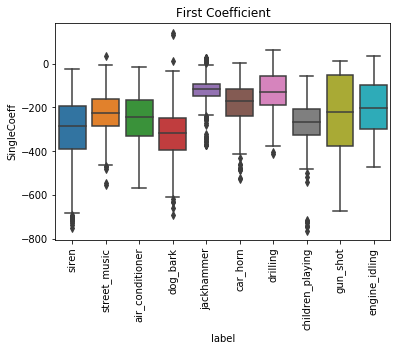

In [223]:
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.title('First Coefficient')


we do the same with the second coefficient for MFCC

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Second Coefficient')

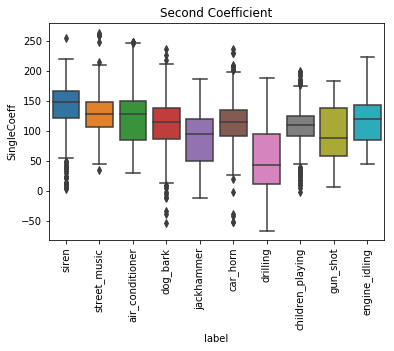

In [224]:
DF1['SingleCoeff']=DF1.apply(lambda row: row.mfccs[1],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.title('Second Coefficient')

In [97]:
#find the two coefficients that have the highest pearson cofficient:
Mat=np.empty((40,len(DF1)))
for i in range(len(DF1)):
    Mat[:,i]=DF1.mfccs.iloc[i]
    
PearsonCoeff=np.corrcoef(Mat)

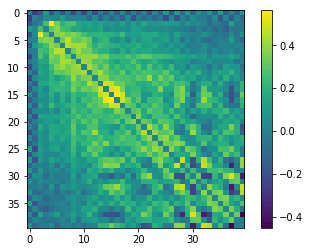

In [98]:
for i in range(len(PearsonCoeff)):
    PearsonCoeff[i,i]=0
    
plt.imshow(PearsonCoeff)


plt.colorbar()

In [102]:
PearsonCoeff[15,16]

0.5626647370779803

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(-30.207854887415643,
 49.71891570545642,
 -28.926940571800525,
 40.03785129584519)

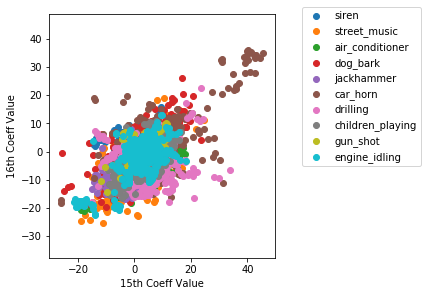

In [157]:
DF1['c1']=DF1.apply(lambda row: row.mfccs[15],axis=1)
DF1['c2']=DF1.apply(lambda row: row.mfccs[16],axis=1)
for label in DF1.label.unique():
    plt.scatter(DF1[DF1.label==label]['c1'],DF1[DF1.label==label]['c2'],label=label)
plt.legend(bbox_to_anchor=(1.1,1.05))
plt.tight_layout()
plt.xlabel('15th Coeff Value')
plt.ylabel('16th Coeff Value')
plt.axis('equal')

In [128]:
np.min(PearsonCoeff)

-0.4511201822877173

In [127]:
PearsonCoeff[37,39]

-0.4511201822877173

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(-43.9442294186374, 22.171435512838116, -23.744367000177085, 44.58433041891037)

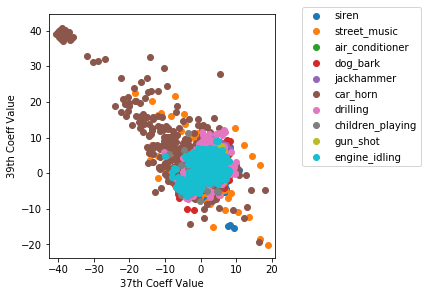

In [156]:
DF1['c1']=DF1.apply(lambda row: row.mfccs[37],axis=1)
DF1['c2']=DF1.apply(lambda row: row.mfccs[39],axis=1)
for label in DF1.label.unique():
    plt.scatter(DF1[DF1.label==label]['c1'],DF1[DF1.label==label]['c2'],label=label)
plt.legend(bbox_to_anchor=(1.1,1.05))
plt.tight_layout()
plt.xlabel('37th Coeff Value')
plt.ylabel('39th Coeff Value')
plt.axis('equal')

Even though we have looked at the distribution of the coefficients for each class using box plots and scatter plots, we see how ecdfs (cumulative distribution functions) look like for the 1st MFCC coeff:

In [159]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y=np.arange(1, n+1)/n
    
    return x,y
    

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'ECDF')

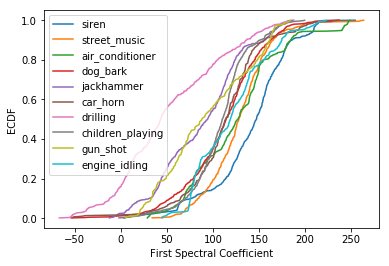

In [226]:
DF1['c1']=DF1.apply(lambda row: row.mfccs[1],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)

plt.legend()
plt.xlabel('First Spectral Coefficient')
plt.ylabel('ECDF')


We will now do the same exercise for the other features starting with: chroma

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'firstCoeff')

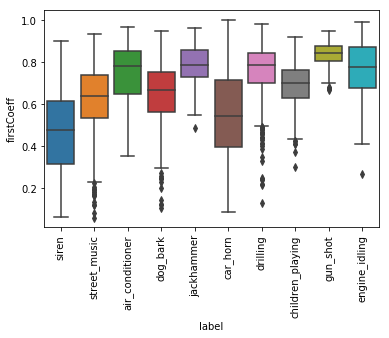

In [166]:
DF1=DF[['label','chroma']]
DF1['SingleCoeff']=DF1.apply(lambda row: row.chroma[0],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('firstCoeff')

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'SecondCoeff')

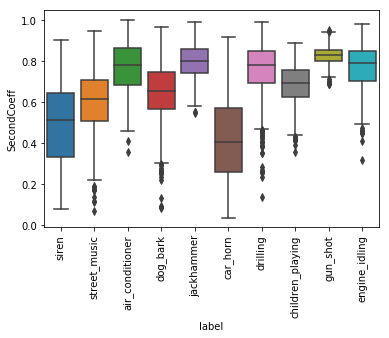

In [167]:
DF1=DF[['label','chroma']]
DF1['SingleCoeff']=DF1.apply(lambda row: row.chroma[1],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('SecondCoeff')

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'ECDF')

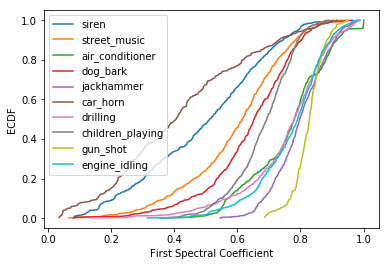

In [169]:
DF1['c1']=DF1.apply(lambda row: row.chroma[1],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)

plt.legend()
plt.xlabel('First Chroma Coefficient')
plt.ylabel('ECDF')

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'ECDF')

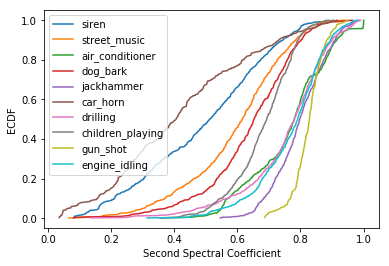

In [168]:
DF1['c1']=DF1.apply(lambda row: row.chroma[1],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)

plt.legend()
plt.xlabel('Second Chroma Coefficient')
plt.ylabel('ECDF')


mel

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Text(0,0.5,'ECDF')

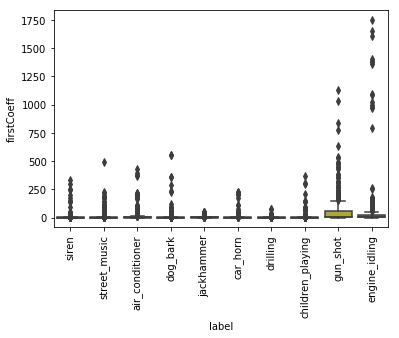

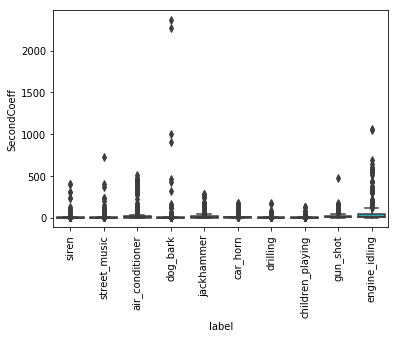

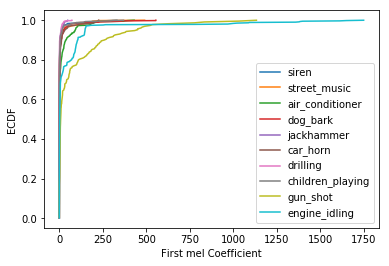

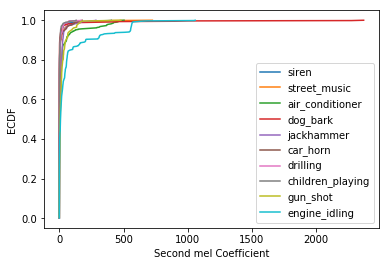

In [184]:
DF1=DF[['label','mel']]
DF1['SingleCoeff']=DF1.apply(lambda row: row.mel[0],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('firstCoeff')

plt.figure()
DF1['SingleCoeff']=DF1.apply(lambda row: row.mel[1],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('SecondCoeff')

plt.figure()
DF1['c1']=DF1.apply(lambda row: row.mel[0],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)
plt.legend()
plt.xlabel('First mel Coefficient')
plt.ylabel('ECDF')

plt.figure()
DF1['c1']=DF1.apply(lambda row: row.mel[1],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)
plt.legend()
plt.xlabel('Second mel Coefficient')
plt.ylabel('ECDF')

contrast

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Text(0,0.5,'ECDF')

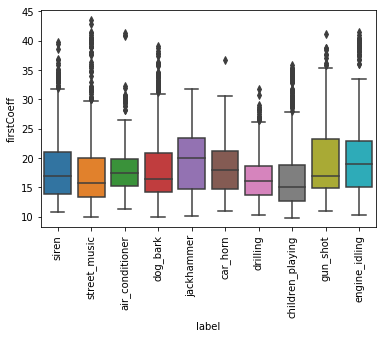

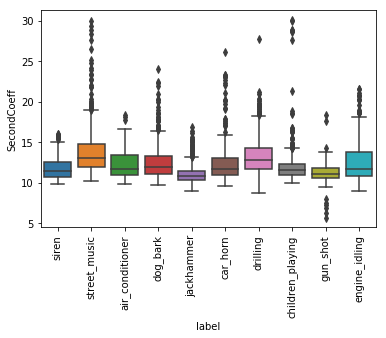

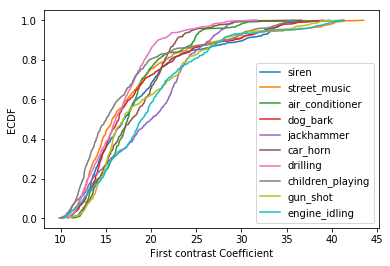

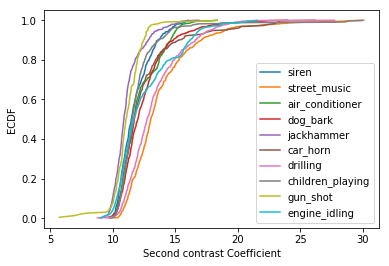

In [186]:
DF1=DF[['label','contrast']]
DF1['SingleCoeff']=DF1.apply(lambda row: row.contrast[0],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('firstCoeff')

plt.figure()
DF1['SingleCoeff']=DF1.apply(lambda row: row.contrast[1],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('SecondCoeff')

plt.figure()
DF1['c1']=DF1.apply(lambda row: row.contrast[0],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)
plt.legend()
plt.xlabel('First contrast Coefficient')
plt.ylabel('ECDF')

plt.figure()
DF1['c1']=DF1.apply(lambda row: row.contrast[1],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)
plt.legend()
plt.xlabel('Second contrast Coefficient')
plt.ylabel('ECDF')

tonnetz

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Text(0,0.5,'ECDF')

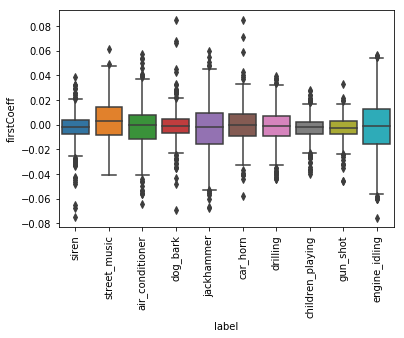

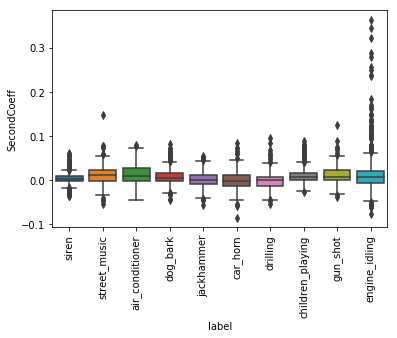

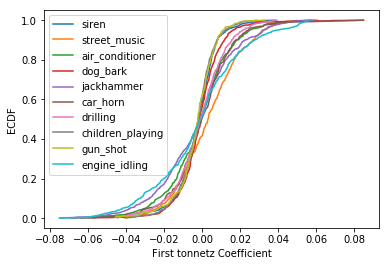

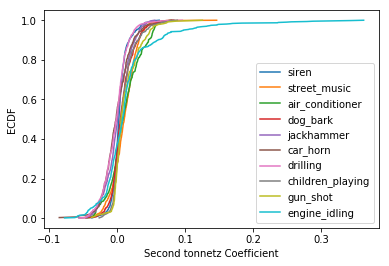

In [188]:
DF1=DF[['label','tonnetz']]
DF1['SingleCoeff']=DF1.apply(lambda row: row.tonnetz[0],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('firstCoeff')

plt.figure()
DF1['SingleCoeff']=DF1.apply(lambda row: row.tonnetz[1],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('SecondCoeff')

plt.figure()
DF1['c1']=DF1.apply(lambda row: row.tonnetz[0],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)
plt.legend()
plt.xlabel('First tonnetz Coefficient')
plt.ylabel('ECDF')

plt.figure()
DF1['c1']=DF1.apply(lambda row: row.tonnetz[1],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)
plt.legend()
plt.xlabel('Second tonnetz Coefficient')
plt.ylabel('ECDF')